In [3]:
# modified from https://github.com/SherlockLiao/Deep-Dream/blob/master/show_image.ipynb
import torch
import torchvision.models as models
from torchvision import transforms
from PIL import Image
from deepDream import dream, showtensor
import torch.nn as nn
import spectroUtils as sUtils
import IPython.display as ipd
import librosa
import librosa.display

In [4]:
#Original hip-hopaudio
trackId = 2
spectroSize = 224
minAmp = -80.0
maxAmp = 1.9073486e-06
audioDirectory = "data/fma_small/"
audioFilename = audioDirectory + "000/000002.mp3"
x, sr = librosa.load(audioFilename, sr=None, mono=True, duration = 10, offset = 0)
start, end = 0, 30
ipd.Audio(data=x[start*sr:end*sr], rate=sr)

In [5]:
scaledSpectro, phase, origSpectroSize = sUtils.loadSpectro(trackId, spectroSize, minAmp, maxAmp)
scaledSpectro

Variable containing:
( 0 ,.,.) = 
  131  171  179  ...   210  175  180
  172  186  190  ...   208  196  186
  194  199  198  ...   209  208  213
      ...         ⋱        ...      
   37   42   54  ...    58   58  106
   25   63   53  ...    54   66  106
   50   58   54  ...    49   51  106
[torch.DoubleTensor of size 1x224x224]

In [7]:
model = models.__dict__['resnet18']()
model = torch.nn.DataParallel(model)
model

DataParallel(
  (module): ResNet(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True)
    (relu): ReLU(inplace)
    (maxpool): MaxPool2d(kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), dilation=(1, 1), ceil_mode=False)
    (layer1): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True)
        (relu): ReLU(inplace)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True)
        (relu): ReLU(inplace)
        (conv2): Conv2d(64, 64, kernel_size

In [9]:
checkpoint_path = 'resnet18/checkpoints/model_best.pth.tar'
print("=> loading checkpoint '{}'".format(checkpoint_path))
checkpoint = torch.load(checkpoint_path)
start_epoch = checkpoint['epoch']
best_prec1 = checkpoint['best_prec1']
model.load_state_dict(checkpoint['state_dict'])
print("=> loaded checkpoint '{}' (epoch: {}) (best_acc: {})"
        .format(checkpoint_path, checkpoint['epoch'], checkpoint['best_prec1']))

=> loading checkpoint 'resnet18/checkpoints/model_best.pth.tar'


AttributeError: module 'torch._C' has no attribute '_cuda_getDevice'

In [59]:
img_transform = transforms.Compose([
    transforms.CenterCrop(800),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

In [60]:
input_img = Image.open('sky.jpg')
input_tensor = img_transform(input_img).unsqueeze(0)
input_np = input_tensor.numpy()

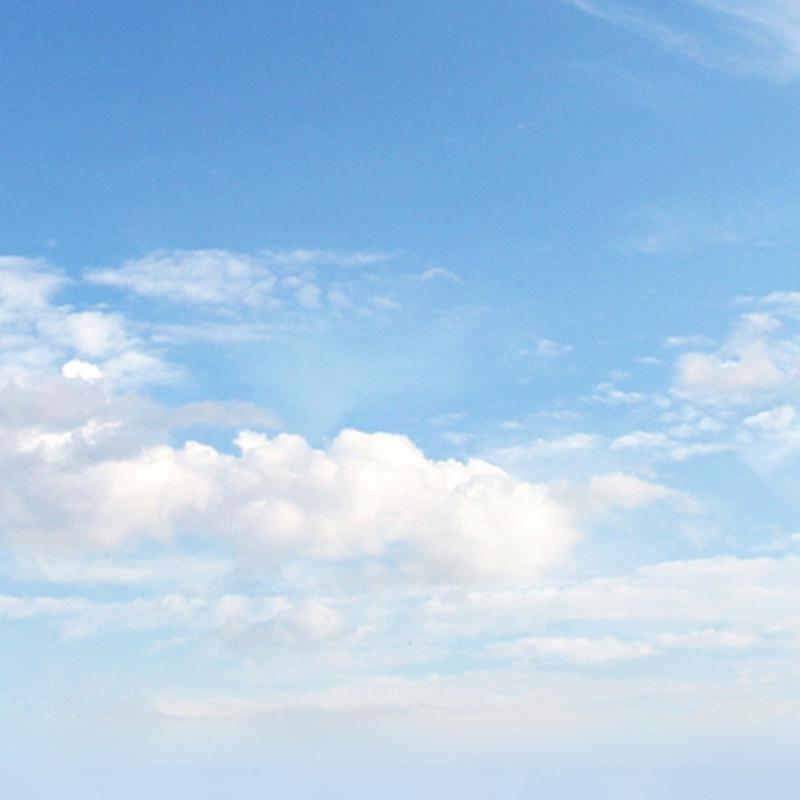

In [61]:
showtensor(input_np)

In [62]:
# load model
model = models.resnet18(pretrained=True)
if torch.cuda.is_available():
    model = model.cuda()
for param in model.parameters():
    param.requires_grad = False
model

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True)
  (relu): ReLU(inplace)
  (maxpool): MaxPool2d(kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), dilation=(1, 1), ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True)
      (relu): ReLU(inplace)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True)
      (relu): ReLU(inplace)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (b

In [63]:
model = nn.Sequential(*list(model.children())[:-3])
model

Sequential(
  (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True)
  (2): ReLU(inplace)
  (3): MaxPool2d(kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), dilation=(1, 1), ceil_mode=False)
  (4): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True)
      (relu): ReLU(inplace)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True)
      (relu): ReLU(inplace)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d

/anaconda3/envs/myEnv2/lib/python3.6/site-packages/scipy/ndimage/interpolation.py:616: UserWarning: From scipy 0.13.0, the output shape of zoom() is calculated with round() instead of int() - for these inputs the size of the returned array has changed.
  "the returned array has changed.", UserWarning)


(1, 3, 149, 149)
(1, 3, 208, 208)
(1, 3, 291, 291)
(1, 3, 408, 408)
(1, 3, 571, 571)
(1, 3, 800, 800)


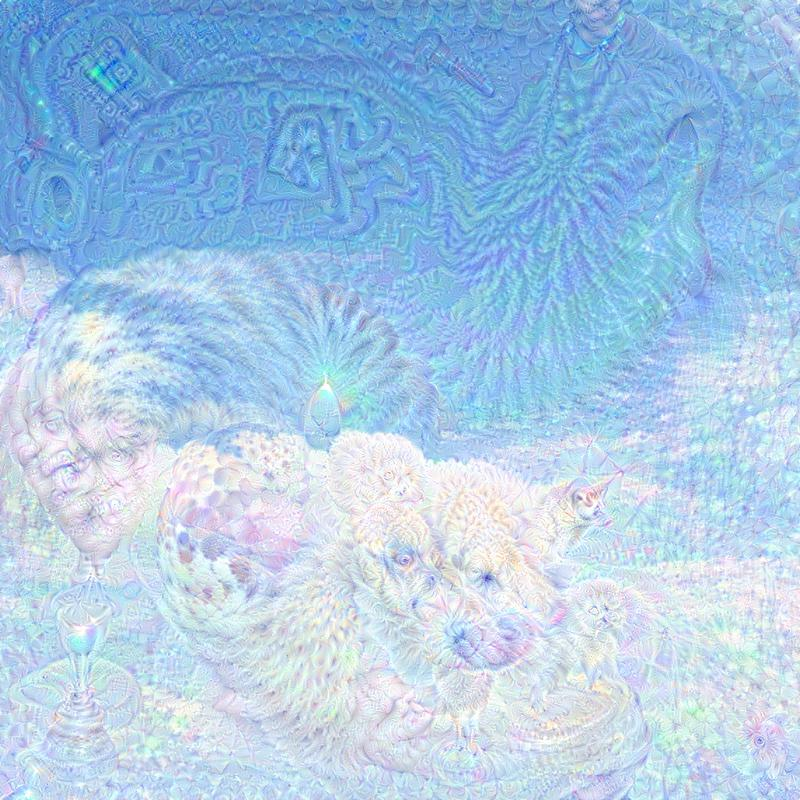

In [64]:
dream(model, input_np)

### Control the Dream

In [65]:
import numpy as np
import torch
from torch.autograd import Variable
from torchvision import transforms
import os
from deepDream import dream
from PIL import Image
from dreamUtil import showtensor

In [66]:
img_transform = transforms.Compose([
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ])
inputs_control = Image.open('kitten.jpg')
inputs_control = img_transform(inputs_control).unsqueeze(0)
inputs_control_np = inputs_control.numpy()

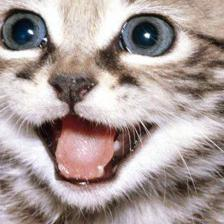

In [68]:
showtensor(inputs_control_np)

In [69]:
model = models.resnet18(pretrained=True)
if torch.cuda.is_available():
    model = model.cuda()
for param in model.parameters():
    param.requires_grad = False
    
model = nn.Sequential(*list(model.children())[:-3])

if torch.cuda.is_available():
    x_variable = Variable(inputs_control.cuda())
else:
    x_variable = Variable(inputs_control)

control_features = model.forward(x_variable)

In [70]:
def objective_guide(dst, guide_features):
    x = dst.data[0].cpu().numpy().copy()
    y = guide_features.data[0].cpu().numpy()
    ch, w, h = x.shape
    x = x.reshape(ch,-1)
    y = y.reshape(ch,-1)
    A = x.T.dot(y) # compute the matrix of dot-products with guide features
    result = y[:,A.argmax(1)] # select ones that match best
    if torch.cuda.is_available():
        result = torch.Tensor(np.array([result.reshape(ch, w, h)], dtype=np.float)).cuda()
    else:
        result = torch.Tensor(np.array([result.reshape(ch, w, h)], dtype=np.float))
    return result

/anaconda3/envs/myEnv2/lib/python3.6/site-packages/scipy/ndimage/interpolation.py:616: UserWarning: From scipy 0.13.0, the output shape of zoom() is calculated with round() instead of int() - for these inputs the size of the returned array has changed.
  "the returned array has changed.", UserWarning)


(1, 3, 149, 149)
(1, 3, 208, 208)
(1, 3, 291, 291)
(1, 3, 408, 408)
(1, 3, 571, 571)
(1, 3, 800, 800)


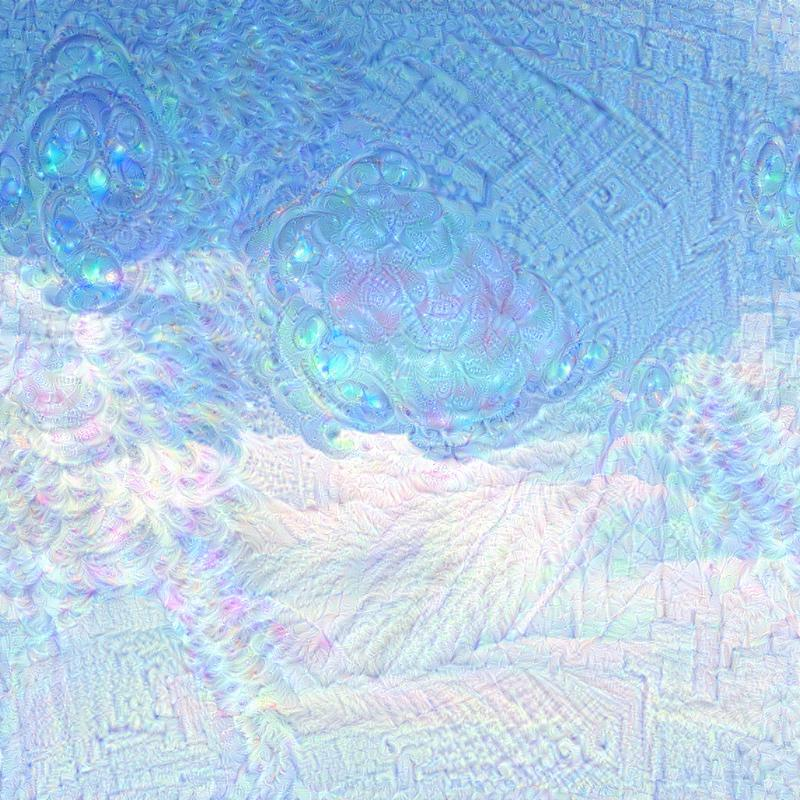

In [71]:
dream(model, input_np, control=control_features, distance=objective_guide)